In [64]:
#coding=utf-8
##############################################
#
# Author:       Shen Wenrui
# Date:         20180326
# Description:
#
##############################################

import sys
from selenium import webdriver

baiduUrl = 'http://www.baidu.com'

appleHomepageUrl = 'https://www.apple.com/cn/'
# Apple-Id Signin page
appleIdHomePageUrl = 'https://appleid.apple.com'
#signPageUrl = '/#!&page=signin'
#signinUrl = appleIdHomepageUrl + signPageUrl

# Apple-Id Signup page
appleIdSignUpPageUrl = appleIdHomePageUrl + '/account'

browser = webdriver.Chrome()

In [68]:
# Step-1: Load the Account Sign up page.
testUrl = appleIdSignUpPageUrl
print(testUrl)

browser.implicitly_wait(5)
browser.get(testUrl)
#html = browser.page_source
#print(html)


https://appleid.apple.com/account


In [69]:
# Step-2: Get the Auth img.
signup_xpath_base = "/html/body/div[@id='content']/aid-web/div[@class='app-container']/div[@id='app-content']/" \
                    "div[@id='flow']/create-app/aid-create"
signupInput_xpath_base = signup_xpath_base + \
                    "//div[@class='idms-flow-container']//div[@class='idms-step-content']/div/div"

authPenal_xpath = signupInput_xpath_base + "/div[6]/div/create-captcha/div/div/div/div/"
authImgBase64_xpath = authPenal_xpath + "/div[1]/div/idms-captcha/div/img"

authImgElement = browser.find_element_by_xpath(authImgBase64_xpath)
#print('authImgElement is: ' + str(authImgElement.get_attribute('innerHTML')))

In [70]:
authImgBase64 = authImgElement.get_attribute('src')
print(authImgBase64)

data:image/jpeg;base64, /9j/4AAQSkZJRgABAgAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABGAKADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDsPJg/6BH/AI5F/wDFUeTB/wBAj/xyL/4qjzoP+gv/AOPxf/E1yfjbxunhq3it9Pu3vdUuP9TEuxlUZxlsLk88ADrQB1nkwf8AQI/8ci/+Ko8mD/oEf+ORf/FV51beDtV8RRC48W+LpQZAGNlb

In [71]:
import base64 
authImgStr = base64.b64decode(authImgBase64[len('data:image/jpeg;base64, '):])
authImg_f = open("001.jpeg", "wb")
authImg_f.write(authImgStr)
authImg_f.close()

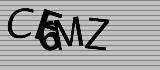

In [72]:
from IPython.display import Image 
Image(filename='001.jpeg')

In [45]:
#import PIL.Image
#im = PIL.Image.open('001.jpeg')
#im.show()

In [73]:
# Step-3: Recognize the Auth img.
parsed_auth_code = "CF6MZ"

In [74]:
# Input the parsed auth code:
authCode_xpath = authPenal_xpath + "/div[2]//input[@type='text']"
authCode_Element = browser.find_element_by_xpath(authCode_xpath)
authCode_Element.clear()
authCode_Element.send_keys(parsed_auth_code)

In [75]:
# Step-4: Input personal information for signing up.
signupInput_xpath_personalInfo = signupInput_xpath_base + "/div[2]/div"
signupInput_xpath_password     = signupInput_xpath_base + "/div[3]/div"
signupInput_xpath_safeQuestion = signupInput_xpath_base + "/div[4]/div"

In [76]:
# Step-4.1.1: Last_name:
last_name_xpath = signupInput_xpath_personalInfo + "/div[1]//last-name-input//input"
last_name_Element = browser.find_element_by_xpath(last_name_xpath)
last_name_Element.clear()
last_name_Element.send_keys("wenrui")

In [77]:
# Step-4.1.2: First_name:
first_name_xpath = signupInput_xpath_personalInfo + "/div[1]//first-name-input//input"
first_name_Element = browser.find_element_by_xpath(first_name_xpath)
first_name_Element.clear()
first_name_Element.send_keys("shen")

In [78]:
# Step-4.1.3: Nationality:
from selenium.webdriver.support.ui import Select
nationality_xpath = signupInput_xpath_personalInfo + "/div[2]//select"
nationality_select = Select(browser.find_element_by_xpath(nationality_xpath))
nationality_value = "USA" # 美国
nationality_select.select_by_value(nationality_value)

In [79]:
# Step-4.1.4: BirthDay:
user_birthday = "1992年07月20日"
birthday_xpath = signupInput_xpath_personalInfo + "/div[3]//input"
birthday_Element = browser.find_element_by_xpath(birthday_xpath)
birthday_Element.clear()
birthday_Element.send_keys(user_birthday)

In [80]:
# Step-4.2.1: Apple-id (E-mail)
user_email = "zhangxiaozhai80@gmail.com"
email_xpath = signupInput_xpath_password + "/div[1]//input[@type='email']"
email_Element = browser.find_element_by_xpath(email_xpath)
email_Element.clear()
email_Element.send_keys(user_email)

In [83]:
# Step-4.2.2: Password:
user_password = "Apple_swr123"
password_xpath = signupInput_xpath_password + "/div[2]//new-password//input[@type='password']"
password_Element = browser.find_element_by_xpath(password_xpath)
password_Element.clear()
password_Element.send_keys(user_password)

In [84]:
# Step-4.2.3: Password confirm:
confirm_password_xpath = signupInput_xpath_password + "/div[2]//confirm-password//input[@type='password']"
confirm_password_Element = browser.find_element_by_xpath(confirm_password_xpath)
confirm_password_Element.clear()
confirm_password_Element.send_keys(user_password)

In [87]:
# Step-4.3.1: Safe question - 1:
safeQuestion_1_xpath_base = signupInput_xpath_safeQuestion + "//security-questions-answers/div/div[1]"
safeQuestion_1_xpath = safeQuestion_1_xpath_base + '//select'
safeQuestion_1_select = Select(browser.find_element_by_xpath(safeQuestion_1_xpath))
safeQuestion_1_value = "130" # 你少年时代最好的朋友叫什么名字？
safeQuestion_1_select.select_by_value(safeQuestion_1_value)

In [88]:
# Step-4.3.2: Safe question - 1 (Answer):
answer_1 = "Bob"
safeQuestion_1_xpath_answer = safeQuestion_1_xpath_base + "//input[@type='text']"
answer_1_Element = browser.find_element_by_xpath(safeQuestion_1_xpath_answer)
answer_1_Element.clear()
answer_1_Element.send_keys(answer_1)

In [89]:
# Step-4.3.3: Safe question - 2:
safeQuestion_2_xpath_base = signupInput_xpath_safeQuestion + "//security-questions-answers/div/div[2]"
safeQuestion_2_xpath = safeQuestion_2_xpath_base + '//select'
safeQuestion_2_select = Select(browser.find_element_by_xpath(safeQuestion_2_xpath))
safeQuestion_2_value = "136" # 你的理想工作是什么？
safeQuestion_2_select.select_by_value(safeQuestion_2_value)

In [90]:
# Step-4.3.4: Safe question - 2 (Answer):
answer_2 = "Teacher"
safeQuestion_2_xpath_answer = safeQuestion_2_xpath_base + "//input[@type='text']"
answer_2_Element = browser.find_element_by_xpath(safeQuestion_2_xpath_answer)
answer_2_Element.clear()
answer_2_Element.send_keys(answer_2)

In [91]:
# Step-4.3.5: Safe question - 3:
safeQuestion_3_xpath_base = signupInput_xpath_safeQuestion + "//security-questions-answers/div/div[3]"
safeQuestion_3_xpath = safeQuestion_3_xpath_base + '//select'
safeQuestion_3_select = Select(browser.find_element_by_xpath(safeQuestion_3_xpath))
safeQuestion_3_value = "145" # 你去过的第一个海滨浴场是哪一个？
safeQuestion_3_select.select_by_value(safeQuestion_3_value)

In [92]:
# Step-4.3.6: Safe question - 3 (Answer):
answer_3 = "Long Beach"
safeQuestion_3_xpath_answer = safeQuestion_3_xpath_base + "//input[@type='text']"
answer_3_Element = browser.find_element_by_xpath(safeQuestion_3_xpath_answer)
answer_3_Element.clear()
answer_3_Element.send_keys(answer_3)

In [95]:
# Submit
submit_xpath = signup_xpath_base + "//div[@class='idms-flow-container']//div[@class='idms-step-footer clearfix']//button[@type='button']"
browser.find_element_by_xpath(submit_xpath).click()

In [96]:
browser.quit()